In [1]:
pkg load signal
clear all
close all

In [2]:
fs = 1000;  % sampling rate, Hz
% debounce time is 8ms

t = 0:1/fs:80;

In [3]:
function [signal] = square_signal(f, A, A0, t)
    signal = uint8(A0+A*square(2*pi*f*t) + 3*sin(2*pi*100*f*t));
    %signal = uint8(A0+A*sin(2*pi*f*t));
end

In [4]:
%% generate the signal
signal = zeros(1, size(t, 2));

signal(1:round(end/3)) = square_signal(0.1389, 12, 128, t(1:round(end/3)));  % 50W
signal(round(end/3):round(end/2)) = square_signal(50, 16, 200, t(round(end/3):round(end/2)));  % 18kW
signal(round(end/2):end-20) = square_signal(4, 16, 80, t(round(end/2):end-20));
signal(end-20:end) = 80;

In [5]:
minmax_samples = 4 * fs;  % 4 seconds
signal_max = movmax(signal, minmax_samples);
signal_min = movmin(signal, minmax_samples);
signal_thres = (signal_max + signal_min) / 2;

In [6]:
signal_emax = zeros(1, size(signal, 2));
signal_emin = zeros(1, size(signal, 2));
% start in invalid state
signal_emax(1) = 0;
signal_emin(1) = 255;

for i = 2:size(signal,2)
    %signal_emax(i) = signal_emax(i-1) * 0.99;
    signal_emax(i) = signal_emax(i-1) - 1/256;
    signal_emin(i) = signal_emin(i-1) + 1/256;
    if signal(i) > signal_emax(i)
        signal_emax(i) = signal(i);
    end
    if signal(i) < signal_emin(i)
        signal_emin(i) = signal(i);
    end
end

signal_ethres = (signal_emax + signal_emin) / 2;

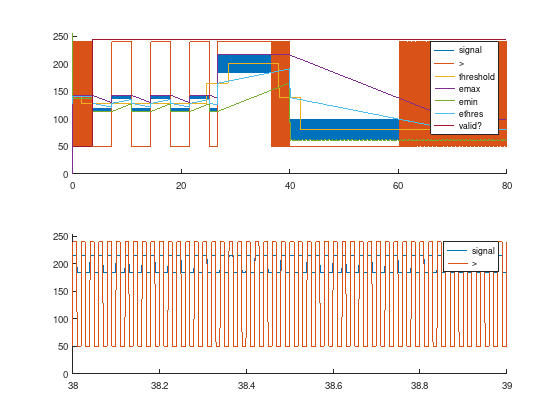

In [7]:
%%plot -f svg
%%plot gnuplot
figure
subplot(2,1,1)
hold on
%xlim([10 20])
plot(t, signal)
%plot(t, signal_max)
%plot(t, signal_min)
plot(t, 50+(signal > signal_ethres)*190)
plot(t, signal_thres)
plot(t, signal_emax)
plot(t, signal_emin)
plot(t, signal_ethres)
plot(t, 50+((signal_emax - signal_emin) > 8)*194)
legend('signal', '>', 'threshold', 'emax', 'emin', 'ethres', 'valid?')
ylim([0 255])

subplot(2,1,2)
hold on
ylim([0 255])
xlim([38 39])
plot(t, signal)
plot(t, 50+(signal > signal_ethres)*190)
legend('signal', '>')
